In [1]:
import os

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [ ]:
root = "/Users/chau/my_work/research/GNN_fake_news_detection/fake_news_detection_gnns/logs/"

In [35]:
def plot(data, img_name, x_label='epoch', y_label=""):

    plt.figure(figsize=(10,8))
    ax = sns.lineplot(data=data)
    ax.set(xlabel=x_label, ylabel=y_label)

    plt.setp(ax.get_legend().get_texts(), fontsize='15')
    plt.savefig(os.path.join(root, img_name),  bbox_inches='tight')
    plt.show()

# Cora

In [36]:
df_official = pd.read_csv(os.path.join(root, "Cora_GAT_official_results.csv"))
df_our = pd.read_csv(os.path.join(root, "Cora_GAT_our_results_2.csv"))

In [37]:
df_official.head()
df_official["train_acc"]  = df_official["train_acc"] * 100
df_official["val_acc"]  = df_official["val_acc"] * 100

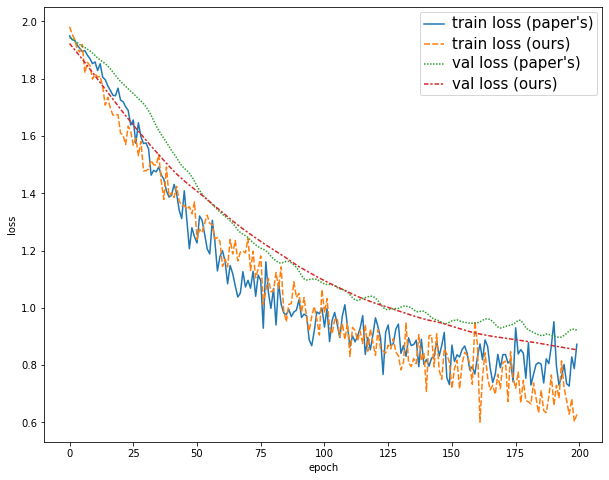

In [38]:
num_obs = len(df_official)
df_loss = pd.DataFrame({"train loss (paper's)": df_official["train_loss"],
                        "train loss (ours)": df_our["train_loss_list"][:num_obs],
                        "val loss (paper's)": df_official["val_loss"],
                        "val loss (ours)": df_our["val_loss_list"][:num_obs],})

plot(df_loss, "cora_loss.png", x_label='epoch', y_label="loss")

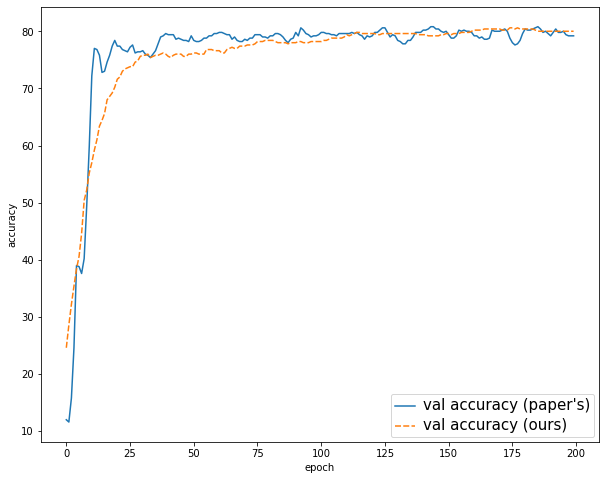

In [39]:
num_obs = len(df_official)
df_acc = pd.DataFrame({"val accuracy (paper's)": df_official["val_acc"],
                        "val accuracy (ours)": df_our["val_acc_list"][:num_obs]})
plot(df_acc, "cora_acc_on_val_set.png", x_label='epoch', y_label="accuracy")

# gossipcop

In [40]:
df_official = pd.read_csv(os.path.join(root, "gossipcop_official_results.csv"))
df_our = pd.read_csv(os.path.join(root, "gossipcop_our_results.csv"))

df_official["val_acc"] *= 100
df_official["test_acc"] *= 100
df_official.head()

,Epoch,train_acc,train_loss,val_acc,test_acc
0,1,0.5101,0.6913,48.53,49.92
1,2,0.6804,0.6842,69.96,66.62
2,3,0.6621,0.6746,67.77,65.05
3,4,0.8013,0.6514,82.23,80.27
4,5,0.8352,0.5944,85.71,82.98


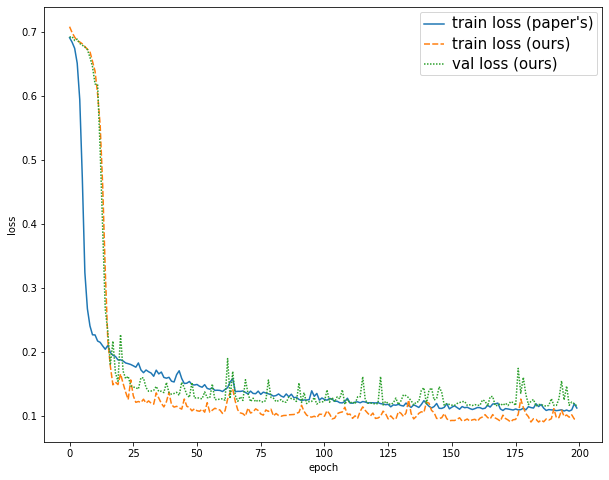

In [41]:
num_obs = len(df_official)
df_loss = pd.DataFrame({"train loss (paper's)": df_official["train_loss"],
                        "train loss (ours)": df_our["train_loss"][:num_obs],
                        # "val loss (paper's)": df_official["val_loss"],
                        "val loss (ours)": df_our["val_loss"][:num_obs],})

plot(df_loss, "gossipcop_loss.png", x_label='epoch', y_label="loss")

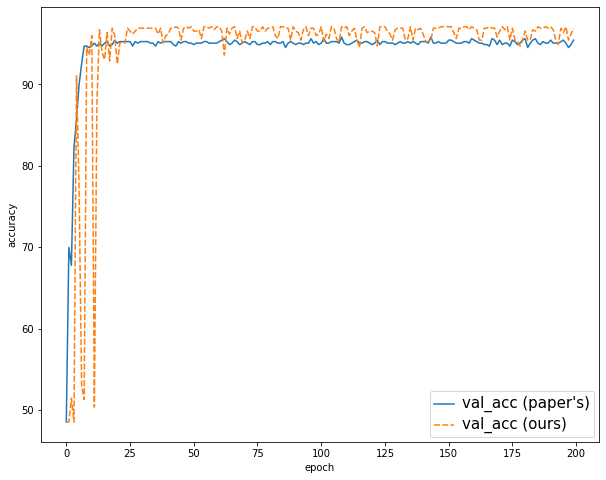

In [42]:
num_obs = len(df_official)
df_loss = pd.DataFrame({"val_acc (paper's)": df_official["val_acc"],
                        "val_acc (ours)": df_our["val_acc"][:num_obs],
                        # "val loss (paper's)": df_official["val_f1"],
                        # "val loss (ours)": df_our["val_loss"][:num_obs],
                        })

plot(df_loss, "gossipcop_acc.png", x_label='epoch', y_label="accuracy")